# Este notebook trata da importação do dataframe que servirá de base para os modelos de aprendizagem de máquina e está dividido da seguinte forma:
## 1 - Importa e processa dados do Secta (MERCADORIAS.csv)
## 2 - Analisa e processa coluna 'ncm'
## 3 - Cria funções auxiliares para o processamento da coluna descrição
## 4 - Analisa e processa coluna 'descricao'
## 5 - Cria a coluna 'descricao_limpa'
## 6 - Cria a coluna 'descricao_limpa_sem_stopwords'
## 7 - Cria a coluna 'descricao_limpa_stemming'
## 8 - Cria a coluna 'descricao_limpa_sem_stopwords_stemming'

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import unicodedata
import re

import nltk
from nltk.stem import RSLPStemmer
import operator

from collections import Counter, defaultdict
from wordcloud import WordCloud

import sys
sys.path.append('..')
import extras.processtec as pt


## 1 - Importa e processa dados do Secta

In [2]:
secta = pd.read_csv('../data/MERCADORIAS.csv')

In [3]:
len(secta)  # tamanho do dataframe secta

4467033

## 1.1 - Extrai informações do dataframe:
### tamanho: 4.467.033
### - colunas:
### Data Registro, tipo de dado object 
### tipo, tipo de dado object 
### NCM, tipo de dado loat64
### descrição, tipo de dado object 
### marca, tipo de dado object 
### modelo, tipo de dado object 
### Observacao, tipo de dado object 

In [4]:
secta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467033 entries, 0 to 4467032
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Data Registro  object 
 1   tipo           object 
 2   NCM            float64
 3   descrição      object 
 4   marca          object 
 5   modelo         object 
 6   Observacao     object 
dtypes: float64(1), object(6)
memory usage: 238.6+ MB


In [5]:
secta.head(30)

,Data Registro,tipo,NCM,descrição,marca,modelo,Observacao
0,2010-01-06 00:00:00,ELETRONICOS,95041010.0,VIDEO GAME,MICROSOFT,XBOX 360,NaN
1,2010-01-06 00:00:00,ELETRONICOS,95041010.0,VIDEO GAME,SONY,PLAYSTATION 2,NaN
2,2010-01-06 00:00:00,ELETRONICOS,95041099.0,CONTROLE DE VIDEO GAME,SONY,PS2,NaN
3,2010-01-06 00:00:00,ELETRONICOS,95041099.0,CONTROLE DE VIDEO GAME,SONY,PS3,S/ FIO
4,2010-01-06 00:00:00,ELETRONICOS,95041099.0,ACESS DE VIDEO GAME,SONY,PS2,NaN
5,2010-01-06 00:00:00,ELETRONICOS,95041099.0,CONTROLE DE VIDEO GAME,NaN,NaN,NaN
6,2010-01-06 00:00:00,ELETRONICOS,95041099.0,CONTROLE DE VIDEO GAME,NINTENDO,WII,NaN
7,2010-01-06 00:00:00,ELETRONICOS,95041099.0,ACESS DE VIDEO GAME,NaN,NaN,NaN
8,2010-01-06 00:00:00,PERFUMES,33030010.0,PERFUME,NaN,NaN,NaN
9,2010-01-06 00:00:00,ELETRONICOS,95041099.0,MEMORY CARD P/VIDEO GAME,SONY,PSII,NaN


In [6]:
secta.describe()

,NCM
count,4.467014e+06
mean,6.961921e+07
std,2.493719e+07
min,0.000000e+00
25%,4.201009e+07
50%,8.504401e+07
75%,8.527199e+07
max,1.000000e+08


## Delimita o dataset para dados do ano 2021

In [7]:
secta = secta[secta['Data Registro'] > '2021-01-01 00:00:00']

In [8]:
len(secta)  # tamanho do dataframe secta

174808

In [9]:
secta.head()

,Data Registro,tipo,NCM,descrição,marca,modelo,Observacao
4103,2021-01-04 00:00:00,OUTRAS,85177099.0,ACESS DE CELULAR,NaN,NaN,NaN
4104,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,MARRY ME,100ML
4105,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,REMEMBER,100ML
4106,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,ROSE GOLD,100ML
4107,2021-01-04 00:00:00,OUTRAS,33049990.0,MAQUIAGEM,NaN,NaN,NaN


### 1.2 - renomeia colunas

In [10]:
# renomeia as colunas
secta = secta.rename(columns={"NCM": "ncm", "descrição": "desc", "Observacao": "observacao"})

### 1.3 - exclui linhas com tipo e descrição vazias

In [11]:
sum(secta.desc.isna())

0

In [12]:
secta = secta.dropna(subset=['desc'])

In [13]:
sum(secta.tipo.isna())

0

In [14]:
secta = secta.dropna(subset=['tipo'])

### 1.4 - substitui a descrição genérica *[OUTROS (DEMAIS TIPOS)] por espaço vazio

In [15]:
# quantidade de termos '*[OUTROS (DEMAIS TIPOS)]' na coluna 'desc'
len(secta[secta['desc'] == '*[OUTROS (DEMAIS TIPOS)]'])

4184

In [16]:
# substitui '*[OUTROS (DEMAIS TIPOS)]' por vazio e verifica quantidade
secta['desc'] = secta.desc.replace('*[OUTROS (DEMAIS TIPOS)]', '')
len(secta[secta['desc'] == '*[OUTROS (DEMAIS TIPOS)]'])

0

### 1.5 - substitui o tipo genérico OUTRAS por espaço vazio

In [17]:
# quantidade de termos 'OUTRAS' na coluna 'tipo'
len(secta[secta['tipo'] == 'OUTRAS'])

41721

In [18]:
# substitui 'OUTRAS' por vazio e verifica quantidade
secta['tipo'] = secta.tipo.replace('OUTRAS', '')
len(secta[secta['tipo'] == 'OUTRAS'])

0

### 1.5 - Substitui valores NaN das colunas tipo, descrição, marca, modelo e Observacao

In [19]:
# substitui tudo que é NaN por vazio
secta['tipo'] = secta.tipo.replace(np.nan, '', regex=True)

In [20]:
secta['desc'] = secta.desc.replace(np.nan, '', regex=True)

In [21]:
secta['marca'] = secta.marca.replace(np.nan, '', regex=True)

In [22]:
secta['modelo'] = secta.modelo.replace(np.nan, '', regex=True)

In [23]:
secta['observacao'] = secta.observacao.replace(np.nan, '', regex=True)

In [24]:
secta.head(30)

,Data Registro,tipo,ncm,desc,marca,modelo,observacao
4103,2021-01-04 00:00:00,,85177099.0,ACESS DE CELULAR,,,
4104,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,MARRY ME,100ML
4105,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,REMEMBER,100ML
4106,2021-01-04 00:00:00,PERFUMES,33030010.0,PERFUME,D HERMOSA,ROSE GOLD,100ML
4107,2021-01-04 00:00:00,,33049990.0,MAQUIAGEM,,,
4108,2021-01-04 00:00:00,BRINQUEDOS,95030099.0,BRINQUEDO,,,
4956,2021-01-04 00:00:00,INFORMATICA,85256090.0,ADAPTADOR USB P/REDE S/FIO,TP-LINK,ARCHER T4U,
4957,2021-01-04 00:00:00,,95045000.0,ACESS DE VIDEO GAME,LOGITECH,X52 PRO,S/N 1750RY000779
4958,2021-01-04 00:00:00,INFORMATICA,85291019.0,ANTENA PARA INTERNET,UBIQUITI,LBE-M5-23,
4959,2021-01-04 00:00:00,BEBIDAS,22087000.0,LICOR,AMARULA,750ML,


### 1.5 - concatena as colunas 'desc', 'marca', 'modelo' e 'observacao' e cria nova coluna chamada 'descricao'

In [25]:
# cria nova coluna chamada 'descricao' cujo conteúdo é a concatenação 
# das colunas 'desc', 'marca', 'modelo' e 'observacao'
secta['descricao'] = secta['tipo'] + ' ' + secta[
    'desc'].astype(str) + ' ' + secta['marca'].astype(str) +' '  + secta[
    'modelo'].astype(str) + ' '  + secta['observacao'].astype(str)

### 1.6 - cria um novo dataframe com as colunas 'descricao' e 'ncm'

In [26]:
# cria novo dataframe com as colunas 'descricao' e 'ncm' 
secta = secta[['descricao','ncm']]

In [27]:
secta.head()

,descricao,ncm
4103,ACESS DE CELULAR,85177099.0
4104,PERFUMES PERFUME D HERMOSA MARRY ME 100ML,33030010.0
4105,PERFUMES PERFUME D HERMOSA REMEMBER 100ML,33030010.0
4106,PERFUMES PERFUME D HERMOSA ROSE GOLD 100ML,33030010.0
4107,MAQUIAGEM,33049990.0


In [28]:
len(secta)

174808

## 2 - Analisa e processa coluna "ncm"

## 2.1 - Análise de dados não numéricos e campos vazios. Tenta transformar valores em float, o que falhar transformar em 'NaN' para depois excluir

In [29]:
# tenta transformar em float, se não conseguir marca como NaN
for i, value in enumerate(secta.ncm):
    try:
        float(value)
    except Exception:
        secta.ncm[i] = float('NaN')

In [30]:
# quantidade de itens faltantes na coluna ncm
sum(secta.ncm.isna())

8

In [31]:
# apaga todas as linhas do dataframe onde 
# o valor da coluna ncm é valor faltante
secta = secta.dropna(subset=['ncm'])

In [32]:
# tamanho do dataframe após remoção
# dos valores faltantes
len(secta)

174800

## 2.2 - Transforma valores em números inteiros, converte para string e preenche os zeros a esquerda de modo a termos 8 caracteres no total.

In [33]:
secta['ncm_str'] = secta.ncm.astype(float).astype(int).astype(str)
secta['ncm_str'] = secta.ncm_str.str.zfill(8)  # preenche zeros a esquerda de modo a termos 8 caracteres no final

## 2.3 Cria colunas "capitulo", "posicao", "subposicao", "item" e "subitem" -

In [34]:
# os dois primeiros dígitos da NCM
secta['capitulo'] = secta.ncm_str.str[:2]

In [35]:
# terceiro e quarto dígitos da NCM
secta['posicao'] = secta.ncm_str.str[2:4]

In [36]:
# quinto e sexto dígito da NCM
secta['subposicao'] = secta.ncm_str.str[4:6]

In [37]:
# sétimo dígito da NCM
secta['item'] = secta.ncm_str.str[6]

In [38]:
# oitavo dígito da NCM
secta['subitem'] = secta.ncm_str.str[7]

In [39]:
# apaga se tiver capitulo '00' - no DF original havia uma linha de teste com esse valor
secta = secta.drop(secta[secta['capitulo'] == '00'].index)

In [40]:
len(secta)

174793

## 2.4 - Análise estatística da coluna 'capítulo'.

### 2.4.1 Cria dicionário contendo o somatório total de cada capítulo

In [41]:
# cira dicionário com somatório total de itens na coluna
capitulos = {}
for value in secta.capitulo:
    if capitulos.get(value):
        capitulos[value] += 1
    else:
        capitulos[value] = 1

### 2.4.2 ordena do capítulos em ordem decrescente de quantidade

In [42]:
# ordena dicionário em ordem decrescente de quantidade
capitulos = dict(sorted(capitulos.items(), key=lambda item: item[1],reverse=True))
# exibe os 10 itens com mais registros
[(item,qtidd) for item, qtidd in capitulos.items() if qtidd > 2100]

[('85', 74655),
 ('84', 20499),
 ('33', 16486),
 ('22', 12356),
 ('95', 8808),
 ('24', 5224),
 ('90', 4055),
 ('87', 3689),
 ('61', 3649),
 ('42', 2266)]

### 2.4.3 Gráfico de barras da quantidade de capítulos

Text(0, 0.5, 'Quantidade')

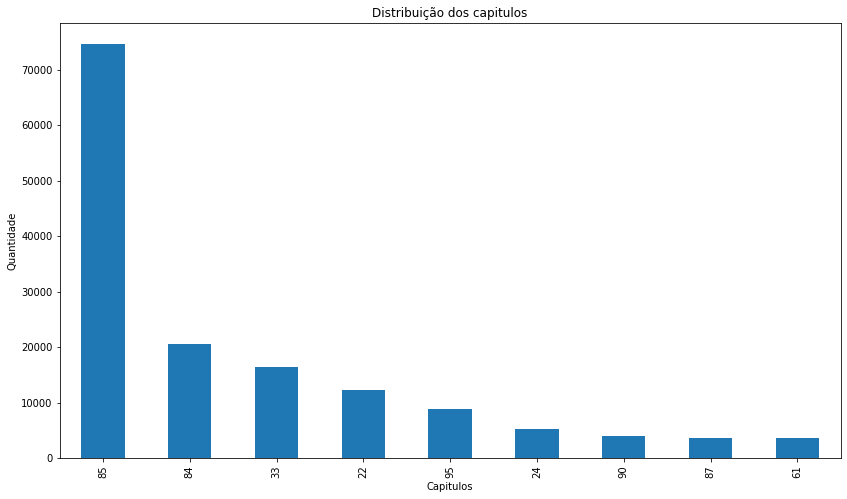

In [43]:
# Cria gráfico de barras
values = secta['capitulo'].value_counts()  # conta quantidade de valores da coluna capítulo
threshold = 3000  # define limite inferior para exibição no gráfico (exibir 10 primeiros )
mask = values > threshold  
values = values.loc[mask] # pega os valores que devem ser exibidos

# informações do gráfico
ax = values.plot(kind='bar', figsize=(14,8), title="Distribuição dos capitulos")
ax.set_xlabel("Capitulos")
ax.set_ylabel("Quantidade")

## Conclusão - 'capitulo' com maior representatividade são:'85', '84', '33', '22', '95', '24', '90', '87', '61'

## 2.5 - Análise estatística da coluna 'posicao'.

In [44]:
# cira dicionário com somatório total de itens na coluna
posicao = {}
for value in secta.posicao:
    if posicao.get(value):
        posicao[value] += 1
    else:
        posicao[value] = 1

# ordena dicionário em ordem decrescente de quantidade
posicao = dict(sorted(posicao.items(), key=lambda item: item[1],reverse=True))
# exibe os 10 itens com mais registros
[(item,qtidd) for item, qtidd in posicao.items() if qtidd > 5100]

[('17', 36314),
 ('04', 20938),
 ('03', 18479),
 ('71', 14402),
 ('18', 10076),
 ('02', 9821),
 ('23', 6502),
 ('28', 6076),
 ('07', 5727)]

Text(0, 0.5, 'Quantidade')

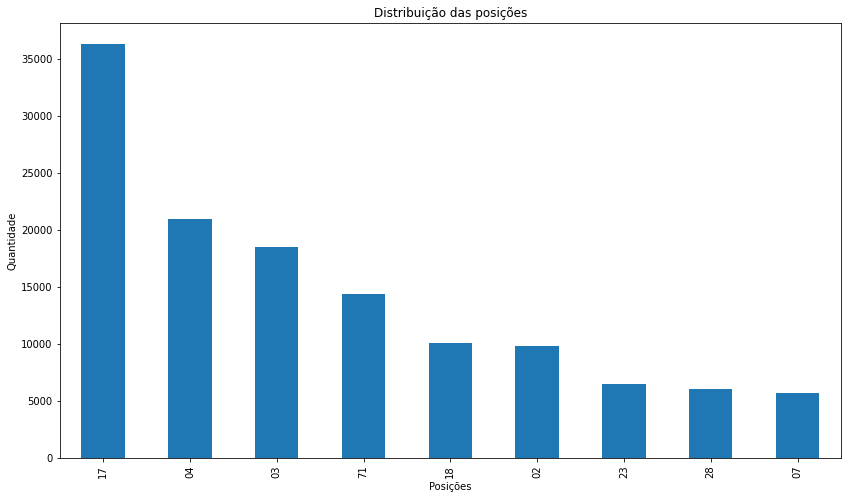

In [45]:
# Cria gráfico de barras
values = secta['posicao'].value_counts()  # conta quantidade de valores da coluna capítulo
threshold = 5100  # define limite inferior para exibição no gráfico (exibir 10 primeiros )
mask = values > threshold  
values = values.loc[mask] # pega os valores que devem ser exibidos

# informações do gráfico
ax = values.plot(kind='bar', figsize=(14,8), title="Distribuição das posições")
ax.set_xlabel("Posições")
ax.set_ylabel("Quantidade")

## Conclusão - as posições com maiores frequências acumuladas são 17, 04, 03, 71, 18, 02, 23, 28, 07

## 2.6 - Análise estatística da coluna 'subposicao'.

In [46]:
# cira dicionário com somatório total de itens na coluna
subposicao = {}
for value in secta.subposicao:
    if subposicao.get(value):
        subposicao[value] += 1
    else:
        subposicao[value] = 1

# ordena dicionário em ordem decrescente de quantidade
subposicao = dict(sorted(subposicao.items(), key=lambda item: item[1],reverse=True))
# exibe os 10 itens com mais registros
[(item,qtidd) for item, qtidd in subposicao.items() if qtidd > 7100]

[('12', 17865),
 ('00', 17041),
 ('90', 16873),
 ('62', 13966),
 ('30', 12833),
 ('21', 12567),
 ('41', 10077),
 ('10', 9313),
 ('70', 8356),
 ('20', 7888)]

Text(0, 0.5, 'Quantidade')

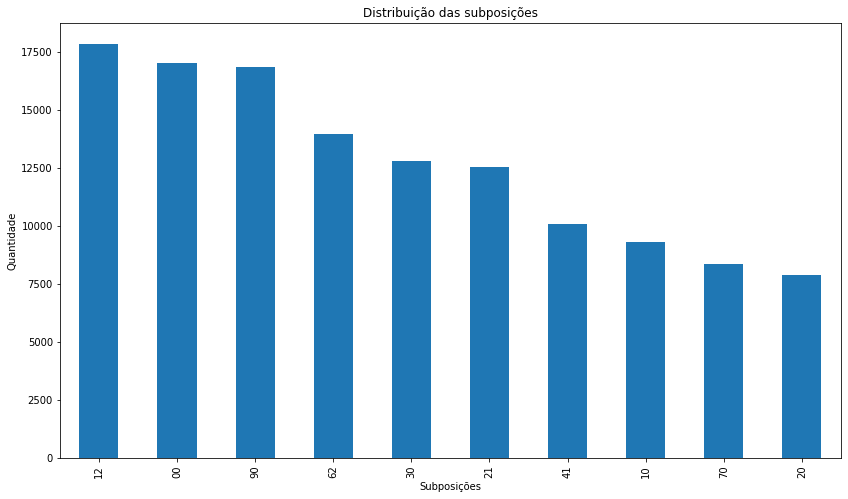

In [47]:
values = secta['subposicao'].value_counts()
threshold = 7100
mask = values > threshold
values = values.loc[mask]

ax = values.plot(kind='bar', figsize=(14,8), title="Distribuição das subposições")
ax.set_xlabel("Subposições")
ax.set_ylabel("Quantidade")

## Conclusão - Os itens na coluna 'subposicao', os com maior representatividade (quantidade maior que 7100 itens) são: 12, 00, 90, 62, 30, 21, 41, 10, 70, 20

## 2.7 - Análise estatística das colunas 'item' e 'subitem'.

Text(0, 0.5, 'Quantidade')

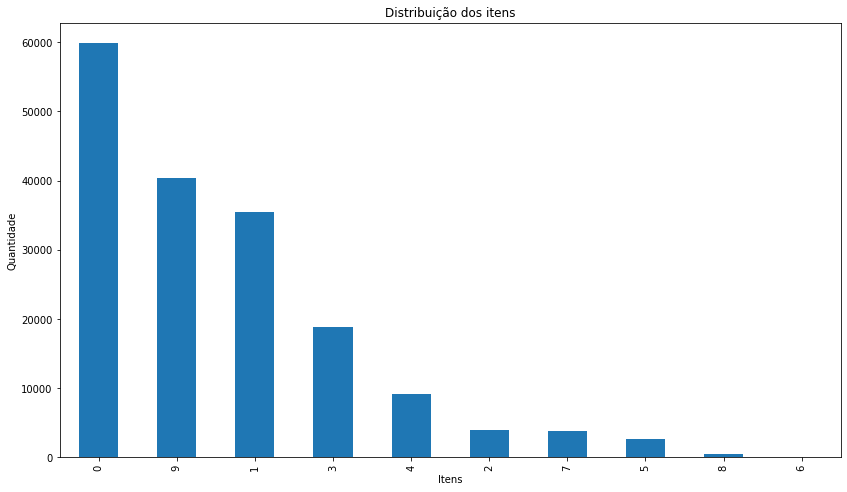

In [48]:
# Cria gráfico de barras
values = secta['item'].value_counts()  # conta quantidade de valores da coluna capítulo

# informações do gráfico
ax = values.plot(kind='bar', figsize=(14,8), title="Distribuição dos itens")
ax.set_xlabel("Itens")
ax.set_ylabel("Quantidade")

Text(0, 0.5, 'Quantidade')

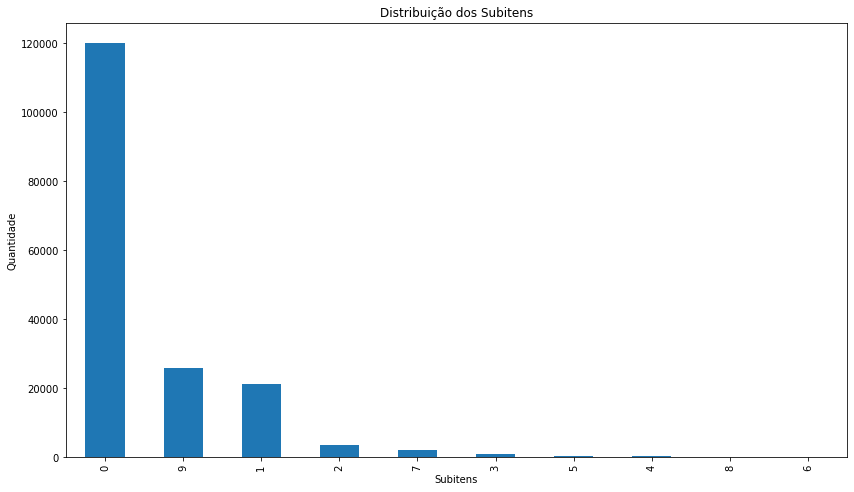

In [49]:
# Cria gráfico de barras
values = secta['subitem'].value_counts()  # conta quantidade de valores da coluna capítulo

ax = values.plot(kind='bar', figsize=(14,8), title="Distribuição dos Subitens")
ax.set_xlabel("Subitens")
ax.set_ylabel("Quantidade")

## Conclusão: o dígito 0 é o que tem maior reprensentatividade tanto para item como para subitem

## 2.7 - Capítulos Faltantes:

In [50]:
print(f'O dataframe itens não contém o(s) capitlo(s):')
for i in range(96):
    if len(secta[secta['capitulo'] == str(i+1).zfill(2)]) == 0:
        print(f'{str(i+1).zfill(2)}', end=' ')

O dataframe itens não contém o(s) capitlo(s):
14 41 43 45 50 51 53 59 75 77 78 79 81 

### dataframe completo não contém os capítulos 43 53 75 77 81
### dataframe de 2021 não contém os capítulos 14 41 43 45 50 51 53 59 75 77 78 79 81

## 3 - Cria funções que serão úteis para o processamento do texto do dataframe

## 3.1 - Função que remove sinais de pontuação e espaços

In [51]:
def remove_accents(input_str): 
    """ 
    Função converte string em bytes, mas antes normaliza string usando NFKD
    
    NFKD - decompõem em dois code point e analisa compatibilidades (sem ser canonicamente equivalente)
    https://docs.python.org/3/library/unicodedata.html
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

## 3.2 - Função que retorna somente o radical da palavra passada como parâmetro

In [52]:
st = RSLPStemmer()
def stem_word(word):
    aux = word
    if aux != b'':
        aux = st.stem(aux.decode("utf-8"))  # pega o radical das palavras
        aux = str.encode(aux)
    return aux

## 3.3 - Função que verifica se é CPF ou CNPJ

In [53]:
def cpf_ou_cnpj(string):
    if re.search(
         "^([0-9]{2}[\.]?[0-9]{3}[\.]?[0-9]{3}[\/]?[0-9]{4}[-]?[0-9]{2})|([0-9]{3}[\.]?[0-9]{3}[\.]?[0-9]{3}[-]?[0-9]{2})$",
         word):
        return True
    return False    

## 3.4 - Função que processa o texto:
## a) convertendo para minúsculo
## b) removendo sinais de pontuação, 
## c) removendo sinais ortográficos,
## d) remove CPF e CNPJ,
## e) removendo stopwords (opcional), 
## f) retorna radicais das palavras - stemming (opcional)

In [54]:
def cria_coluna_descricao(dataframe, col_origem, col_destino, stop_words, stemming=False):
    num_words = Counter()
    word_count = Counter()
    times = 0
    novas_linhas = []
    col_index = dataframe.columns.get_loc(col_origem) + 1 

    for linha in dataframe.itertuples():  # para cada linha do dataframe
        lista_linha = re.split('\W+', linha[col_index].strip())  # exclui sinais de pontuação, inclusive espaços
        num_words[len(lista_linha)]+=1  # atualiza contador de quantidade de palavras
        nova_linha = []
        for word in lista_linha:
            word = word.lower()
            if word not in stop_words:  #verifica se não está nos stopword
                # verifica se não é CPF ou CNPJ
                 if not cpf_ou_cnpj(word):
                    word = remove_accents(word)  # remove acentuação
                    if stemming:
                        word = stem_word(word)  # retorna somente o radical da palavra 
                    if word == b'no':
                        print(lista_linha)
                    word_count[word]+=1  # atualiza contador de palavras
                    nova_linha.append(word.decode().strip())
        if len(nova_linha) >= 0:
            novas_linhas.append(' '.join(nova_linha))
    
    dataframe[col_destino] = novas_linhas  # cria nova coluna do dataframe com as palavras limpas
    return num_words, word_count

## 4 - Analisa e processa coluna 'descricao', que servirá para criação do vocabulário

## 4.1 - Criação da lista de palavras irrelevantes
## Antes de criar vocabulários é necessário realizar análise das palavras irrelevantes.
## Palavras irrelevantes são aquelas que descrevem a mercadoria num nível muito detalhado, incluindo por exemplo o nome da marca, o número de referência, etc. 
## Exemplo de descrição: 'telefone celular marca samsung', tanto a palavra 'marca' como 'samsung' são irrelevantes para classificação.
## Dessa forma, iremos incluir na lista de stopwords (palavras que deverão ser eliminadas do dataframe) algumas palavras de referência (marca, ref, imitação) e a palavra seguinte a essa.

In [55]:
stop_words_posterior = set(['marca', 'ref', 'referencia', 'imitacao', 'modelo', 'nº', 
                            'n', 'volume', 'tamanho', 'origem'])
aux = list(stop_words_posterior)
excecao = ['gabinete', 'bulbo', 'eletrico', 'inflavel', 'componentes', 
           'diversas', 'diversos', 'digital', 'estatuetas', 'microfibra', 
          'transparentes', 'headphone', 'bracelete', 'feminino']

In [56]:
for linha in secta['descricao']:
    linha = remove_accents(linha).decode()
    linha = linha.lower()
    for word in aux:
        if word in linha.split():  # garante que a stopword existe na linha
            posi = re.search(r'\b(' + word + r')\b', linha).start()
            if posi:
                try:
                    stop_word = linha[posi:].split()[1]  # pega a palavra posterior à palavra procurada
                    if not stop_word in excecao:
                        stop_words_posterior.add(stop_word)
                except IndexError:
                    pass

In [57]:
stop_words_anterior = set(['g', 'gramas', 'kg', 'kilos', 'kilograma', 
                           'kilogramas', 'quilo','quilos', 'ml', 'l', 
                           'litro', 'litros', 'mm', 'cm', 'm', 'giga', 
                           'gigabyte', 'gigabytes', 'gb', 'tera', 'terabyte', 
                           'terabytes', 'tb'])
aux = list(stop_words_anterior)

In [58]:
for linha in secta['descricao']:
    linha = remove_accents(linha).decode()
    linha = linha.lower()
    for word in aux:
        if word in linha.split(): # garante que a stopword existe na linha
            posi = re.search(r'\b(' + word + r')\b', linha).start()
            if posi:
                try:
                    stop_word = linha[:posi].split()[-1]  # pega a palavra anterior à palavra procurada
                    if not stop_word in excecao:
                        stop_words_anterior.add(stop_word)
                except IndexError:
                    pass

In [59]:
len(stop_words_posterior), len(stop_words_anterior)

(1344, 500)

In [60]:
stop_words_itens = stop_words_posterior.union(stop_words_anterior)
len(stop_words_itens)

1794

In [61]:
stop_words_outras = set(['brazil', '2020', '2019', 'parte', 'kit', 'xiaomi', 
                         'huawei', '', '4gb', '32gb', '64gb', '128gb', '100ml', '750ml', 
                         'no', '9', '8', 'c', 'imei', 'tp', 'link', 'redmi', 'hd'])
stop_words_itens = stop_words_itens.union(stop_words_outras)
len(stop_words_itens)

1813

In [62]:
stop_words_posterior

{'a144/',
 '8180',
 'nj-172',
 'mp-2218ase1',
 'ly-576',
 's6-v8-45w',
 'dow',
 '45w',
 'ac-1',
 '5041',
 'f8120-1100-d107',
 'centara',
 'yj1012',
 '6040',
 '69',
 'b-a54;',
 'ear7+',
 'vietna-cx1',
 'microsoft',
 'dell,',
 '(mini',
 ',modelo',
 'sc',
 'hr-3002',
 'ps3',
 'v8kz',
 'ty-721',
 '14',
 'f822-235-f140',
 'es077',
 'm8021y',
 '163',
 '2013/2013,',
 'cj-008',
 'cv-m010037',
 'fi0913-wx,',
 'zenit',
 'jn-836',
 '2009',
 'famosas',
 'cp18-004',
 'computador',
 'bk-n20',
 '116',
 '690',
 'nj-181',
 '171',
 '20/0285410-0',
 '191',
 'a-75;',
 '1587',
 'fossil',
 'a174',
 'ferrari',
 'mini',
 '2.mq3v',
 'irlanda',
 'cqn1',
 'lc-509',
 'b05',
 '30q',
 'bf03-066',
 'pd-11',
 'f836-350-f163',
 'argentina',
 'p-3;',
 'variado',
 'm1903f10g',
 'florida',
 'jn-855',
 'indeterminado',
 'f880-800-f219',
 '48',
 'ty709-12',
 'ac-8',
 'russia',
 'm8305p',
 'f850-5100-f005',
 'c2',
 '33-2304',
 'bw-1902,',
 '18780',
 'a1480',
 's/o',
 '2010,',
 'td-6000a',
 'xb360',
 'p80',
 'a-81;',
 'al-12

## 4.2 - Adicionar as palavras irrelevantes na lista de stopwords da biblioteca nltk

In [63]:
stopwords = nltk.corpus.stopwords.words('portuguese')
[stopwords.append(_) for _ in stop_words_itens]
stopwords = list(set(stopwords))  # apaga repetidas 
print(len(stopwords))

2006


In [64]:
stopwords

['',
 'a144/',
 'estejam',
 '8180',
 'nj-172',
 's6-v8-45w',
 'ly-576',
 'mp-2218ase1',
 'dow',
 '45w',
 'ac-1',
 '5041',
 'f8120-1100-d107',
 'joico',
 'houve',
 'centara',
 'yj1012',
 '6040',
 '69',
 'cadeira',
 '16,200',
 'b-a54;',
 'ear7+',
 'vietna-cx1',
 '0.3',
 'microsoft',
 'dell,',
 '0,84',
 '(mini',
 ',modelo',
 '2,14',
 'sc',
 'hr-3002',
 'ps3',
 'v8kz',
 'ty-721',
 '14',
 'mademoiselle',
 'freecor',
 '34,50',
 'f822-235-f140',
 'es077',
 'm8021y',
 'galaxy',
 '163',
 '2013/2013,',
 'cj-008',
 'cv-m010037',
 'fi0913-wx,',
 'terão',
 'zenit',
 'label',
 'jn-836',
 'fill',
 '2009',
 'famosas',
 'cp18-004',
 'computador',
 'liga',
 'bk-n20',
 '116',
 'pea',
 '690',
 'nj-181',
 '171',
 '20/0285410-0',
 '191',
 'a-75;',
 '1587',
 'fossil',
 'a174',
 'ferrari',
 'nossas',
 'mini',
 'tem',
 'm.benz',
 '2.mq3v',
 'irlanda',
 'cqn1',
 'lc-509',
 'b05',
 '30q',
 '700',
 'bf03-066',
 'kiss-236',
 'pd-11',
 'f836-350-f163',
 '1300',
 'argentina',
 'p-3;',
 '0,13',
 '2000',
 'variado',
 

## 5 - Cria a coluna 'descricao_limpa'
## 5.1 - Nessa coluna não foram retiradas as stopwords e também não foram retirados os afixos 

In [65]:
# cria a coluna descricao_limpa sem informar nenhuma stopword e sem fazer o stemming
num_words, word_count = cria_coluna_descricao(secta, 'descricao', 'descricao_limpa', "")

['CIGARROS', 'CHARUTO', 'PARTAGAS', 'MADURO', 'NO', '1', 'CAIXA', 'COM', '25', 'UNIDADES']
['CIGARROS', 'CHARUTO', 'PARTAGAS', 'SERIE', 'E', 'NO', '2', 'CAIXA', 'COM', '25', 'UNIDADES']
['CIGARROS', 'CHARUTO', 'HOYO', 'DE', 'MONTERREY', 'EPICURE', 'NO', '2', 'CAIXA', 'COM', '25', 'UNIDADES']
['INFORMATICA', 'PLACA', 'MAE', 'ASUS', 'PRIME', 'A320M', 'K', 'INSTALADA', 'NO', 'GABINETE']
['INFORMATICA', 'COOLER', 'VENTILADOR', 'CPU', 'AMD', 'INSTALADO', 'NO', 'GAINETE']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'NO', '168', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '152', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '235', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '250', '25ML']
['CREME', 'PROD', 'BELEZA', 'DREAM', 'BRAND', 'NO', '194', '200ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLECTION', 'NO', '010', '25ML']
['BEBIDAS', 'UISQUE', 'JACK', 'DANIELS', 'OLD', 'Nº', '7', '1', 'LITRO']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '

['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406800']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406805']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406788']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406813']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406799']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406794']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406804']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406784']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406785']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406789']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406793']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406782']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406787']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V181224

['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518337']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02520648']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02521096']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02522226']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518704']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02520795']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02520649']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02521194']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02522127']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO

['RECARREGADOR', 'DE', 'BATERIA', 'TP', 'LINK', 'P', 'CELULAR', 'TP', 'PB20000MAH', 'Nº', 'S', '2199211003307']
['RECARREGADOR', 'DE', 'BATERIA', 'TP', 'LINK', 'P', 'CELULAR', 'TP', 'PB20000MAH', 'Nº', 'S', '2199211002902']
['RECARREGADOR', 'DE', 'BATERIA', 'TP', 'LINK', 'P', 'CELULAR', 'TP', 'PB20000MAH', 'Nº', 'S', '2199211000556']
['RECARREGADOR', 'DE', 'BATERIA', 'TP', 'LINK', 'P', 'CELULAR', 'TP', 'PB20000MAH', 'Nº', 'S', '2199211000517']
['RECARREGADOR', 'DE', 'BATERIA', 'TP', 'LINK', 'P', 'CELULAR', 'TP', 'PB20000MAH', 'Nº', 'S', '2199211002918']
['INFORMATICA', 'CONECTOR', 'FIBRA', 'OTICA', 'QSFP', '40G', 'LR4', 'Nº', 'S', 'ASTT2007240113']
['INFORMATICA', 'CONECTOR', 'FIBRA', 'OTICA', 'QSFP', '40G', 'LR4', 'Nº', 'S', 'ASTT2007240114']
['INFORMATICA', 'CONECTOR', 'FIBRA', 'OTICA', 'QSFP', '40G', 'LR4', 'Nº', 'S', 'ASTT2007240115']
['INFORMATICA', 'CONECTOR', 'FIBRA', 'OTICA', 'QSFP', '40G', 'LR4', 'Nº', 'S', 'ASTT2007240116']
['INFORMATICA', 'MODEM', 'FIBERHOME', 'GPON', 'ONU',

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0TJ07829']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0TJ06046']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29227', '60U403026']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29228', '60VJ16120']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29229', '60VC02481']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29228', '60VJ15652']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9C', '64GB', 'Nº', 'S', '29299', '60VE09439']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9C', '64GB', 'Nº', 'S', '29300', '60VE78807']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9C', '64GB', 'Nº', 'S', '29300', '60VE78799']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9C', '64GB', 'Nº', 'S', '29298', '60VC72628']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9C', '64GB', '

['INFORMATICA', 'ACESSÓRIOS', 'PARA', 'REDE', 'FIBRA', 'ÓTICA', 'REMESSA', 'POSTAL', 'Nº', 'OI912107689BR']
['ELETRONICOS', 'RECEPTOR', 'DE', 'SATELITE', 'REMESSA', 'POSTAL', 'Nº', 'OI924890663BR']
['ACESS', 'DE', 'CELULAR', 'REMESSA', 'POSTAL', 'Nº', 'OI974367975BR']
['INFORMATICA', 'ROTEADOR', 'WIFI', 'REMESSA', 'POSTAL', 'Nº', 'OI957783123BR']
['TELEFONES', 'SMARTPHONE', 'REMESSA', 'POSTAL', 'Nº', 'OI961952415BR']
['PARTES', 'E', 'PEÇAS', 'OUTRAS', 'MAQUINAS', 'MICROCONTROLADOR', 'REMESSA', 'POSTAL', 'Nº', 'OD337705854BR']
['PARTES', 'E', 'PEÇAS', 'DE', 'CELULAR', 'REMESSA', 'POSTAL', 'Nº', 'OD079329095BR']
['PARTES', 'E', 'PEÇAS', 'DE', 'CELULAR', 'REMESSA', 'POSTAL', 'Nº', 'OI974376059BR']
['PARTES', 'E', 'PEÇAS', 'DE', 'CELULAR', 'REMESSA', 'POSTAL', 'Nº', 'OI974071508BR']
['ELETRONICOS', 'RECEPTOR', 'DE', 'SATELITE', 'E', 'ACESSÓRIOS', 'REMESSA', 'POSTAL', 'Nº', 'OI964830212BR']
['ELETRONICOS', 'RECEPTOR', 'DE', 'SATELITE', 'REMESSA', 'POSTAL', 'Nº', 'OI924862075BR']
['ELETRONIC

['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['ELETRONICOS', 'JOGO', 'ELETRONICO', 'SONY', 'PS4', 'MARVEL', 'SPIDER', 'MAN', 'INDICAÇÃO', 'DE', 'FABRICAÇÃO', 'NO', 'BRASIL']
['CIGARROS', 'CIGARRO', 'DA', 'MARCA', 'GIFT', 'PRODUZIDO', 'NO', 'PARAGUAI']
['BRINQUEDOS', 'CARRINHO', 'BRINQUEDO', 'JOY', 'NO', '3699', 'RA1']
['CADEADO', 'CX', 'COM', '12', 'UN', 'HOSI', 'Nº', '262', '25', 'MM']
['CADEADO', 'CX', 'COM', '12', 'UN', 'HOSI', 'Nº', '261', '20', 'MM']
['CADEADO', 'CX', 'COM', '6', 'UN', 'TRI', 'COM', 'Nº', '363', '32', 'MM']
['CADEADO', 'CX', 'COM', '12', 'UN', 'VIGEM', 'Nº', '364', '38', 'MM']
['TELEFONES', 'TELEFONE', 'CELULAR', 'APPLE', 'IPHONE', '12', 'PRO', '128GB', 'DOURADO', 'SEM', 'ACESSORIOS', 'Nº', 'SERIE', 'DNPDN1A40D82', 'CHINA', 'PARAGUAI']
['TE

['BEBIDAS', 'GIM', 'TANQUERAY', 'Nº', 'TEN']
['BEBIDAS', 'UISQUE', 'JACK', 'DANIELS', 'Nº', '7']
['AGROTOXICOS', 'AGROTOXICO', 'CONFORME', 'LAUDO', 'PERICIAL', 'ANEXADO', 'NO', 'PROCESSO']
['AGROTOXICOS', 'AGROTOXICO', 'CONFORME', 'LAUDO', 'PERICIAL', 'ANEXADO', 'NO', 'PROCESSO']
['PERFUMES', 'PERFUME', 'CHANEL', 'Nº', '5', '100ML']
['TELEFONES', 'TELEFONE', 'CELULAR', 'SANSUNG', 'GALAXY', 'A10S', '32GB', '4GLTE', 'PRODUZIDO', 'NO', 'BRASIL', 'BF04', '077']
['TELEFONES', 'TELEFONE', 'CELULAR', 'MULTILASER', 'P9076', 'PRODUZIDO', 'NO', 'BRASIL', 'BF04', '077']
['ADESIVO', 'JOES', 'PARA', 'PNEU', 'NO', 'FLATS', 'S', 'O']
['PNEUS', 'PNEU', 'DE', 'AUTOMOVEL', 'MONTADO', 'NA', 'RODA', 'GALANT', 'GL', '905', '295', '80R', '22', '5', 'ORIGEM', 'CHINA', 'NO', 'ESTEPE', '']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'COLLECTION', 'NO', '008', '25ML']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'COLLECTION', 'NO', '116', '30ML']
['MAQUIAGEM', 'MISSHA', 'M', 'PERFECT', 'COVER', 'B', 'B', 'CREAM', 'N

['TELEFONES', 'TELEFONE', 'CELULAR', 'IPHONE', 'NO', 'ESTADO', 'APPLE', 'AWB369699473933160126686', 'L', 'USADO']
['VENTILADOR', 'PARANA', 'LACRES', 'Nº', '22346', '22347', '22348', '22349']
['MANTA', 'COBRE', 'LEITO', 'TAPETE', 'LACRES', 'Nº', '23350', '23351', '23352', '23353', '23354', '23355']
['BRINQUEDOS', 'BRINQUEDO', 'E', 'BAZAR', 'LACRES', 'Nº', '022356', '022357', '022358', '']
['BRINQUEDOS', 'BRINQUEDO', 'E', 'BAZAR', 'LACRES', 'Nº', '022356', '022357', '022358', '']
['MANTA', 'COBRE', 'LEITO', 'TAPETE', 'LACRES', 'Nº', '23350', '23351', '23352', '23353', '23354', '23355']
['VENTILADOR', 'PARANA', 'LACRES', 'Nº', '22346', '22347', '22348', '22349']
['BRINQUEDOS', 'BRINQUEDO', 'E', 'BAZAR', 'LACRES', 'Nº', '022356', '022357', '022358', '']
['MANTA', 'COBRE', 'LEITO', 'TAPETE', 'LACRES', 'Nº', '23350', '23351', '23352', '23353', '23354', '23355']
['VENTILADOR', 'PARANA', 'LACRES', 'Nº', '22346', '22347', '22348', '22349']
['PNEUS', 'PNEU', 'DE', 'AUTOMOVEL', 'DUPLADO', 'NO', '

In [66]:
# itens.loc[8].descricao, itens.loc[8].descricao_limpa

In [67]:
# 20 palavras mais comuns (com maior freq acumulada)
word_count.most_common(20)

[(b'de', 49719),
 (b'eletronicos', 31582),
 (b'telefones', 27452),
 (b'xiaomi', 27094),
 (b'informatica', 23422),
 (b'redmi', 19078),
 (b'celular', 17472),
 (b'smartphone', 16312),
 (b'note', 13307),
 (b'china', 12359),
 (b'bebidas', 12354),
 (b'origem', 11366),
 (b'telefone', 11318),
 (b'perfume', 11206),
 (b'perfumes', 11205),
 (b's', 10987),
 (b'64gb', 9854),
 (b'128gb', 9582),
 (b'vinho', 8989),
 (b'9', 7733)]

## 5.2 - Nuvem de palavras - 50 palavras mais frequentes

In [68]:
# cria um dicionário temporário 'text' com as 50 palavras mais frequentes
max_values = 50
text = {}
for (k, v) in word_count.most_common(max_values):
    text[str(k.decode())] = v

In [69]:
# cria a nuvem de palavras
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(text)

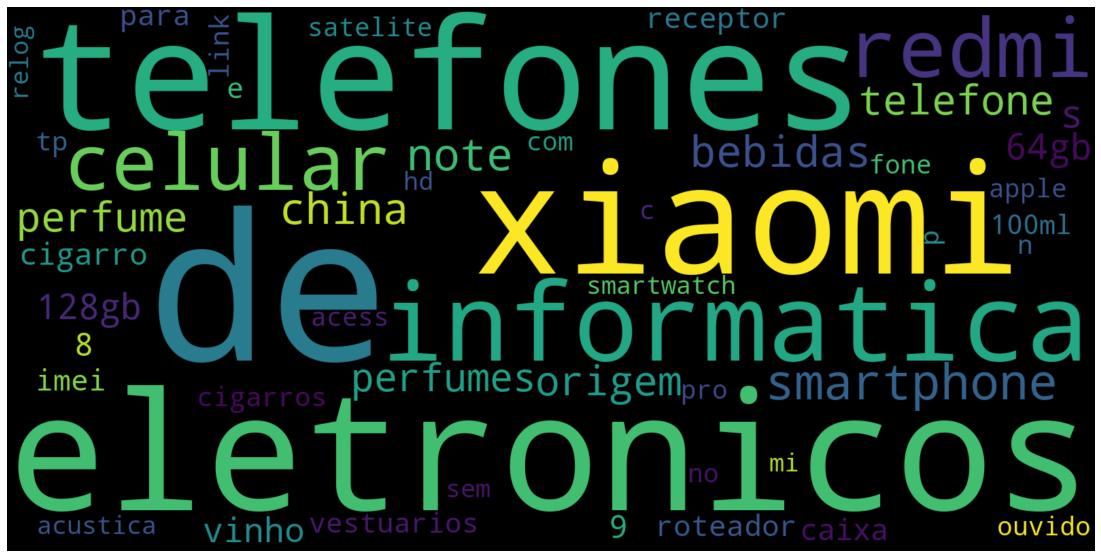

In [70]:
# configurações de plotagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show()

In [71]:
# Cria dataframe com as 50 palavras mais frequentes
df_word_count = pd.DataFrame()
df_word_count['descricao_limpa'] = text.keys()
df_word_count.head(10)

,descricao_limpa
0,de
1,eletronicos
2,telefones
3,xiaomi
4,informatica
5,redmi
6,celular
7,smartphone
8,note
9,china


### Conclusão: Pelo fato de não termos retirado as stopwords, dentre as palavras mais frequentes temos "de", "china", "origem" que são palavras que não agregam nada na classificação pois elas podem estar na descrição de diferentes NCMs

## 5.3 - Salva dataframe em formato parquet

In [72]:
secta.to_parquet('3_secta_desc_limpa.parquet')  # salva em formato parquet

## 6 - Cria a coluna 'descricao_limpa_sem_stopwords'
## 6.1 - Nessa coluna foram retiradas as stopwords para termos descrições com palavras mais importantes. 
## Não foram retirados os afixos 

In [73]:
num_words, word_count = cria_coluna_descricao(secta, 'descricao', 'descricao_limpa_sem_stopwords', stopwords)

In [74]:
# itens.loc[8].descricao, itens.loc[8].descricao_limpa_sem_stopwords

In [75]:
word_count.most_common(20)

[(b'telefones', 27452),
 (b'informatica', 23422),
 (b'celular', 17472),
 (b'smartphone', 16312),
 (b'bebidas', 12354),
 (b'telefone', 11318),
 (b'perfume', 11206),
 (b'perfumes', 11205),
 (b'vinho', 8989),
 (b'roteador', 6408),
 (b'receptor', 6361),
 (b'vestuarios', 5805),
 (b'cigarros', 5484),
 (b'fone', 4880),
 (b'pro', 4576),
 (b'acess', 4484),
 (b'satelite', 4374),
 (b'acustica', 4005),
 (b'smartwatch', 3954),
 (b'relog', 3848)]

## 6.2 - Nuvem de palavras - 50 palavras mais frequentes

In [76]:
max_values = 50
text = {}
for (k, v) in word_count.most_common(max_values):
    text[str(k.decode())] = v

In [77]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(text)

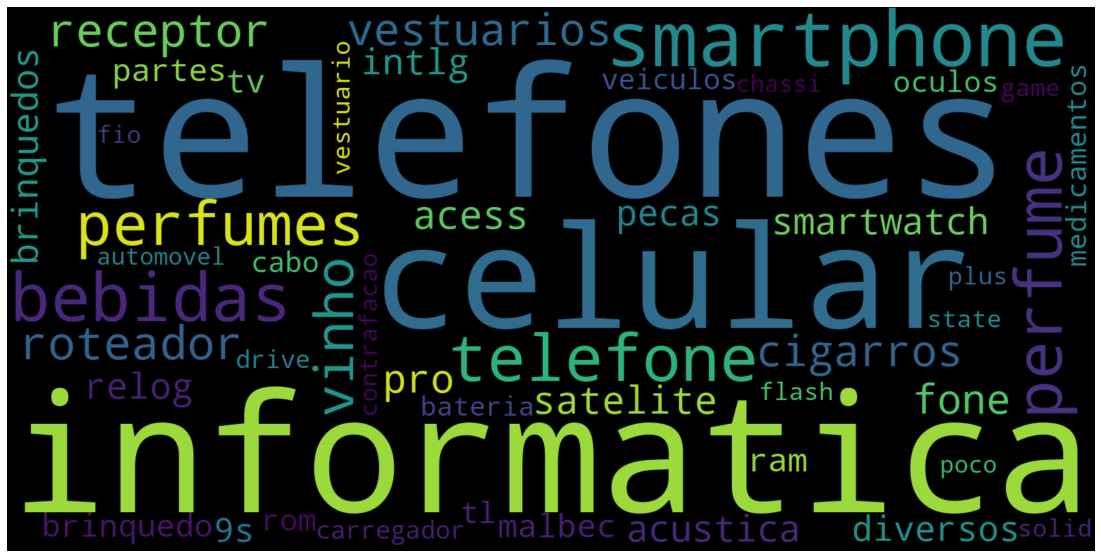

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show()

In [79]:
df_word_count['descricao_limpa_sem_stopwords'] = text.keys()
df_word_count.head(10)

,descricao_limpa,descricao_limpa_sem_stopwords
0,de,telefones
1,eletronicos,informatica
2,telefones,celular
3,xiaomi,smartphone
4,informatica,bebidas
5,redmi,telefone
6,celular,perfume
7,smartphone,perfumes
8,note,vinho
9,china,roteador


### Conclusão: a retirada de stopwords melhorou as palavras da descrição.
### Vale a pena incluir no stopwords "china", "xiaomi", "huawei", "no", "gb"? 

## 6.3 - Salva dataframe em formato parquet

In [80]:
secta.to_parquet('3_secta_desc_limpa_sem_stopwords.parquet')  # salva em formato parquet

## 7 - Cria a coluna 'descricao_limpa_stemming'
## 7.1 - Nessa coluna não foram retiradas as stopwords 
## Mas foram retirados os afixos, mantendo somente o radical das palavras

In [81]:
num_words, word_count = cria_coluna_descricao(secta, 'descricao', 'descricao_limpa_stemming', "", True)

['CIGARROS', 'CHARUTO', 'PARTAGAS', 'MADURO', 'NO', '1', 'CAIXA', 'COM', '25', 'UNIDADES']
['CIGARROS', 'CHARUTO', 'PARTAGAS', 'SERIE', 'E', 'NO', '2', 'CAIXA', 'COM', '25', 'UNIDADES']
['CIGARROS', 'CHARUTO', 'HOYO', 'DE', 'MONTERREY', 'EPICURE', 'NO', '2', 'CAIXA', 'COM', '25', 'UNIDADES']
['INFORMATICA', 'PLACA', 'MAE', 'ASUS', 'PRIME', 'A320M', 'K', 'INSTALADA', 'NO', 'GABINETE']
['INFORMATICA', 'COOLER', 'VENTILADOR', 'CPU', 'AMD', 'INSTALADO', 'NO', 'GAINETE']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'NO', '168', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '152', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '235', '25ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '250', '25ML']
['CREME', 'PROD', 'BELEZA', 'DREAM', 'BRAND', 'NO', '194', '200ML']
['PERFUMES', 'PERFUME', 'BRAND', 'COLECTION', 'NO', '010', '25ML']
['BEBIDAS', 'UISQUE', 'JACK', 'DANIELS', 'OLD', 'Nº', '7', '1', 'LITRO']
['PERFUMES', 'PERFUME', 'BRAND', 'COLLECTION', 'NO', '

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9', '128GB', 'Nº', 'S', '27922', 'K0UJ03092']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25420', '60U308233']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25434', '60T309001']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25420', '60U308337']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25421', '60UR07927']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '24976', '60SW04379']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '24976', '60RN03148']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '8A', '64GB', 'Nº', 'S', '26311', '30T501471']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '8A', '64GB', 'Nº', 'S', '26311', '30T501476']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '8A', '64GB', 'Nº', 'S', '26311', '00TA00624']
['TELEFONE

['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406808']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406802']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406796']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406797']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406803']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406798']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406800']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406805']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406788']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406813']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406799']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406794']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V18122406804']
['INFORMATICA', 'MODEM', 'G', 'EPON', '01G', 'Nº', 'S', 'V181224

['ELETRONICOS', 'CAIXA', 'ACUSTICA', 'JBL', 'PARTY', 'BOX', '300', 'Nº', 'S', 'TL0699', 'LJ0121387']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044286648']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044286341']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044276999']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZIFT', 'GTS', 'A1914', 'Nº', 'S', '19141044277055']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044281673']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044282789']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044273027']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', 'A1914', 'Nº', 'S', '19141044286655']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'GTS', '

['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KK4LJ']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJNAD']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJM29']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KK8N1']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KKX7A']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJP3K']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KKXRW']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJ48V']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJPM0']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJFVY']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KJ4SD']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KHLMQ']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KK4B7']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KK4T4']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1KK4KM']
['INFORMATICA', 'HD', 'SEAGATE', '1TB', 'Nº', 'S', 'ZN1

['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518144']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518688']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02521822']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02517494']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518612']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518542']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'REDMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02518719']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02519582']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'AIRDOTS', '2', 'Nº', 'S', '28312', '02521876']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'XIAOMI', 'AIRD

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD02013']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD02605']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28378', 'S0UW05912']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD01243']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD02037']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD02395']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28378', 'S0VA06214']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28378', 'S0UW06357']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28378', 'S0UW05904']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28377', 'S0VD02367']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S',

['TELEFONES', 'TELEFONE', 'CELULAR', 'BLU', 'Z4', 'MUSIC', 'Nº', 'S', '10800324020049502']
['TELEFONES', 'TELEFONE', 'CELULAR', 'BLU', 'Z4', 'MUSIC', 'Nº', 'S', '10800324020045854']
['TELEFONES', 'TELEFONE', 'CELULAR', 'BLU', 'Z4', 'MUSIC', 'Nº', 'S', '10800324020045790']
['TELEFONES', 'TELEFONE', 'CELULAR', 'BLU', 'Z4', 'MUSIC', 'Nº', 'S', '10800324020045118']
['ACESS', 'DE', 'CAM', 'FOTOGRAFICA', 'XIAOMI', 'MI', 'SELFIE', 'STICK', 'TRIPOD', 'Nº', 'S', '16085', '00294858']
['ACESS', 'DE', 'CAM', 'FOTOGRAFICA', 'XIAOMI', 'MI', 'SELFIE', 'STICK', 'TRIPOD', 'Nº', 'S', '16085', '00294863']
['ACESS', 'DE', 'CAM', 'FOTOGRAFICA', 'XIAOMI', 'MI', 'SELFIE', 'STICK', 'TRIPOD', 'Nº', 'S', '17983', '00159937']
['ACESS', 'DE', 'CAM', 'FOTOGRAFICA', 'XIAOMI', 'MI', 'SELFIE', 'STICK', 'TRIPOD', 'Nº', 'S', '17983', '00159956']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '64GB', 'Nº', 'S', '27894', '60X500438']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '64GB', 'Nº',

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25264', 'E0WS01997']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25434', '60YP00578']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25421', '60YB05186']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25434', '60YP02315']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25264', 'E0WS01845']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25434', '60YP00694']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25264', 'E0WS01837']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25421', '60YB00098']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '30966', '60XW09708']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25434', '60

['INFORMATICA', 'ROTEADOR', 'MIKROTIK', 'RB4011', 'SERIES', 'Nº', 'S', 'D4480C0E1792', '032', 'R2']
['INFORMATICA', 'ROTEADOR', 'XIAOMI', 'MI', 'ROUTER', '4A', 'Nº', 'S', '23319', '20248420']
['INFORMATICA', 'ROTEADOR', 'XIAOMI', 'MI', 'ROUTER', '4A', 'Nº', 'S', '23319', '20246082']
['INFORMATICA', 'ROTEADOR', 'XIAOMI', 'MI', 'ROUTER', '4A', 'Nº', 'S', '23319', '20247672']
['INFORMATICA', 'ROTEADOR', 'XIAOMI', 'MI', 'ROUTER', '4A', 'Nº', 'S', '23319', '20247700']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'ARCHER', 'C5', 'Nº', 'S', '319B028007963']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'TL', 'WR849N', 'Nº', 'S', '2195674015721']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'TL', 'WR849N', 'Nº', 'S', '2195674015726']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'TL', 'WR849N', 'Nº', 'S', '2195674015735']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'TL', 'WR849N', 'Nº', 'S', '2195674015724']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'TL', 'WR849N', 'Nº', 'S', '2195674015733']
['INFORMATICA', 

['VIDEOGAMES', 'VIDEO', 'GAME', 'MICROSOFT', 'XBOX', 'ONE', 'X', '1', 'TB', 'Nº', 'S', '016937183517']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '128GB', 'Nº', 'S', '27283', '20VZ00026']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '128GB', 'Nº', 'S', '27283', '20VZ00151']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '128GB', 'Nº', 'S', '27283', '20VZ00219']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '128GB', 'Nº', 'S', '27283', '20VZ00353']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9', '128GB', 'Nº', 'S', '27921', '20V502579']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9', '128GB', 'Nº', 'S', '27921', '20UW00695']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', 'PRO', '128GB', 'Nº', 'S', '25973', 'K0UF01304']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', 'PRO', '128GB', 'Nº', 'S', '25536', '00UN00649']
['ELETRONICOS', 'BABA', 'ELETRONICA', 'MOTOROLA', 'HALO', 'Nº',

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '28375S0YT06522']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '2838030UW03514']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '2838030UW03589']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '28375S0YT05845']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '28375S0YT06418']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '2838030UW03695']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'MI', 'NOTE', '9', '32GB', 'Nº', 'S', '28375S0YT06294']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'DECO', 'M4R', 'Nº', 'S', '2209418B00990']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'DECO', 'M4R', 'Nº', 'S', '2209418A01077']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'DECO', 'M4R', 'Nº', 'S', '2209418B01076']
['INFORMATICA', 'ROTEADOR', 'TP', 'LINK', 'DECO', 'M4R', 'Nº', 'S', '2209418A00985']
['

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '32GB', 'Nº', 'S', '28375', '30U303561']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '32GB', 'Nº', 'S', '28376', '30TW01513']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '32GB', 'Nº', 'S', '28376', '30TW01982']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29233', '60V408242']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29229', '60UV07899']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29228', '60V572439']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29234', '60UE72402']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '29228', '60V572480']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25421', '60VN04929']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '25421', '60VN02494']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'N

['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'CONDENSADOR', 'Nº', 'S', '3418518100499230170244']
['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'CONDENSADOR', 'Nº', 'S', '3417975030499110120382']
['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'CONDENSADOR', 'Nº', 'S', '3418518100499230170263']
['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'EVAPORADOR', 'Nº', 'S', '3417975030399120130955']
['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'EVAPORADOR', 'Nº', 'S', '3418518100399240170089']
['AR', 'CONDICIONADO', 'P', 'CASA', 'MIDEA', 'MSAF', '12HRN1', 'EVAPORADOR', 'Nº', 'S', '3417975030399120130949']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '9S', '128GB', 'Nº', 'S', '27281', '60YN13745']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', 'NOTE', '8', '64GB', 'Nº', 'S', '24973', '60X902660']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9', '64GB', 'Nº', 'S', '28658', 'E0XE03193']
['TELEFONES', 'S

['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002352285']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002352406']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002347296']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002353575']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002352166']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002352714']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002126110']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002126119']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XIAOMI', 'MI', 'TV', 'STICK', 'Nº', 'S', '26919800002353892']
['ELETRONICOS', 'RECEPTOR', 'DE', 'MÍDIA', 'XI

['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041459749']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041433797']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041468263']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041459801']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041465913']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041464552']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041462634']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041461611']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI', 'MI', 'BAND', '5', 'Nº', 'S', '2835041468226']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'XIAOMI

['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '28947', 'G0Y407524']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '30126', '60WV74029']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '28947', 'G0XE33778']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '30126', '60XS04248']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '30126', '60XR00810']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '30126', '60WV79134']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '28947', 'G0Y301304']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '28947', 'G0Y313806']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '30126', '60WS70374']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB', 'Nº', 'S', '28947', 'G0Y317284']
['TELEFONES', 'SMARTPHONE', 'XIAOMI', 'REDMI', '9A', '32GB',

['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172047237179']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172047237033']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172047237136']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172046232808']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172047237062']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172046232504']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172046230620']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172046232589']
['ELETRONICOS', 'SMARTWATCH', 'RELOG', 'INTLG', 'AMAZFIT', 'BIP', 'U', 'A2017', 'Nº', 'S', '20172046232512']
['ELETRONICOS', 'SM

['ELETRONICOS', 'RECEPTOR', 'DE', 'SATELITE', 'AUDISAT', 'URUS', 'K10', 'C', 'ACESSÓRIOS', 'ENCOMENDA', 'POSTAL', 'Nº', 'SC312329619BR']
['ELETRONICOS', 'RECEPTOR', 'DE', 'SATELITE', 'AUDISAT', 'URUS', 'K10', 'ENCOMENDA', 'POSTAL', 'Nº', 'SC312329619BR']
['ACESS', 'DE', 'CELULAR', 'CAPA', 'PARA', 'CELULAR', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['RELOGIOS', 'PULSEIRA', 'PARA', 'RELOGIO', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['TRIPE', 'MINI', 'TRIPÉ', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'DIZENDO', 'SER', 'XIAOMI', 'SEM', 'FIO', 'REDMI', 'AIR', 'DOTS', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'BASEUS', 'SEM', 'FIO', 'W09', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['BATERIA', 'DE', 'CELULAR', 'POWER', 'BANK', 'BASEUS', 'BS', 'M35', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['FONTE', 'DE', 'ENERGIA', 'BASEUS', '2', '1A', 'ENCOMENDA', 'POSTAL', 'Nº', 'DM376004045BR']
['IN

['TELEFONES', 'TELEFONE', 'CELULAR', 'APPLE', 'IPHONE', '11', '64GB', 'SERIAL', 'Nº', 'DX3DX0KPN72P', 'IMEI', '2', '356856111812124']
['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['INFORMATICA', 'CAIXA', 'ACUSTICA', 'MULTIMIDIA', 'KIMISO', 'ITEM', 'Nº', '40040', '897']
['ELETRONICOS', 'JOGO', 'ELETRONICO', 'SONY', 'PS4', 'MARVEL', 'SPIDER', 'MAN', 'INDICAÇÃO', 'DE', 'FABRICAÇÃO', 'NO', 'BRASIL']
['CIGARROS', 'CIGARRO', 'DA', 'MARCA', 'GIFT', 'PRODUZIDO', 'NO', 'PARAGUAI']
['BRINQUEDOS', 'CARRINHO', 'BRINQUEDO', 'JOY', 'NO', '3699', 'RA1']
['CADEADO', 'CX', 'COM', '12', 'UN', 'HOSI', 'Nº', '262', '25', 'MM']
['CADEADO', 'CX', 'COM', '12', 'UN', 'HOSI', 'Nº', '261', '20', 'MM']
['CADEADO', 'CX', 'COM', '6', 'UN', 'TRI', 'COM', 'Nº', '363', '32', 'MM']
['CADEADO', 'CX', 'COM', '12', 'UN', 'VIGEM', 'Nº', '364', '38', 'MM']
['TELEFONES', 'TELEFONE', 'CELUL

['BEBIDAS', 'UISQUE', 'JACK', 'DANIELS', 'NO', '7', '1', 'LITRO']
['ELETRONICOS', 'TELA', 'TOUCH', 'PARA', 'IPAD', 'NO', 'HOME', 'BUTTON', 'DIVERSOS', 'CAIXA', '36']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'NO', '105']
['PERFUMES', 'PERFUME', 'DREAM', 'BRAND', 'NO', '005']
['CIGARROS', 'CIGARRO', 'HILL', 'REF', 'OFÍCIO', 'Nº', '2825', '2020']
['CIGARROS', 'CIGARRO', 'CLASSIC', 'REF', 'OFÍCIO', 'Nº', '2825', '2020']
['CIGARROS', 'CIGARRO', 'PALERMO', 'REF', 'OFÍCIO', 'Nº', '10992020', '700610']
['BEBIDAS', 'GIM', 'TANQUERAY', 'Nº', 'TEN']
['BEBIDAS', 'UISQUE', 'JACK', 'DANIELS', 'Nº', '7']
['ELETRONICOS', 'FONE', 'DE', 'OUVIDO', 'BOSE', 'USADO', 'INCOMPLETO', 'FONE', 'DE', 'OUVIDO', 'COM', 'ESTOJO', 'C', 'DESGASTE', 'NOS', 'ABAFADORES', '']
['AGROTOXICOS', 'AGROTOXICO', 'CONFORME', 'LAUDO', 'PERICIAL', 'ANEXADO', 'NO', 'PROCESSO']
['AGROTOXICOS', 'AGROTOXICO', 'CONFORME', 'LAUDO', 'PERICIAL', 'ANEXADO', 'NO', 'PROCESSO']
['PERFUMES', 'PERFUME', 'CHANEL', 'Nº', '5', '100ML']
['TELEFONE

['ACESS', 'DE', 'CELULAR', 'GAMEPAD', 'SUPORTE', 'PARA', 'JOGAR', 'NO', 'CELULAR', 'PAIS', 'CHINA']
['ACESS', 'DE', 'CELULAR', 'GAMEPAD', 'SUPORTE', 'PARA', 'JOGAR', 'NO', 'CELULAR', 'PAIS', 'CHINA']
['ELETRONICOS', 'COMPONENTES', 'ELETRONICOS', 'PLACAS', 'ELETRONICAS', 'NO', 'ESTADO', 'DIVERSOS', 'HREMEXPR40608536754767125D73NX', 'L', 'USADO']
['PECAS', 'DIVERSAS', 'KIT', 'PARA', 'MEDICAO', 'E', 'INSPECAO', 'DE', 'PARAFUSO', 'I', 'BOLT', 'LOADMASTER', '3600', 'NO', 'ESTADO', 'DSIC89220132313', 'L', 'USADO']
['ELETRONICOS', 'COMPONENTES', 'ELETRONICOS', 'PLACA', 'COM', 'TECLADO', 'DO', 'OPERADOR', 'NO', 'ESTADO', 'SIEMENS', 'SINUMERIK', '802', 'D', 'HREMEXPR0236534062371118054875', 'L', 'USADO']
['ELETRONICOS', 'COMPONENTES', 'ELETRONICOS', 'PLACA', 'ELETRONICA', 'NO', 'ESTADO', 'ROCKWELL', 'AUTOMATION', '179527', 'A02', 'HREMEXPR369775138339419557895', 'L', 'USADO']
['ELETRONICOS', 'COMPONENTES', 'ELETRONICOS', 'PLACA', 'ELETRONICA', 'NO', 'ESTADO', '394053', 'A01', 'HREMEXPR369775138

In [82]:
# itens.loc[8].descricao, itens.loc[8].descricao_limpa_stemming

In [83]:
word_count.most_common(20)

[(b'de', 49732),
 (b'telefon', 38773),
 (b'eletron', 34361),
 (b'xiaom', 27098),
 (b'informa', 23422),
 (b'perfum', 22427),
 (b'redm', 19080),
 (b'celul', 17507),
 (b'smartphon', 16322),
 (b'not', 13399),
 (b'beb', 13189),
 (b'cigarr', 12472),
 (b'chin', 12363),
 (b'orig', 11809),
 (b's', 10987),
 (b'64gb', 9854),
 (b'128gb', 9582),
 (b'vinh', 9010),
 (b'9', 7733),
 (b'vestuari', 7699)]

## 7.2 - Nuvem de palavras - 50 palavras mais frequentes

In [84]:
max_values = 50
text = {}
for (k, v) in word_count.most_common(max_values):
    text[str(k.decode())] = v

In [85]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(text)

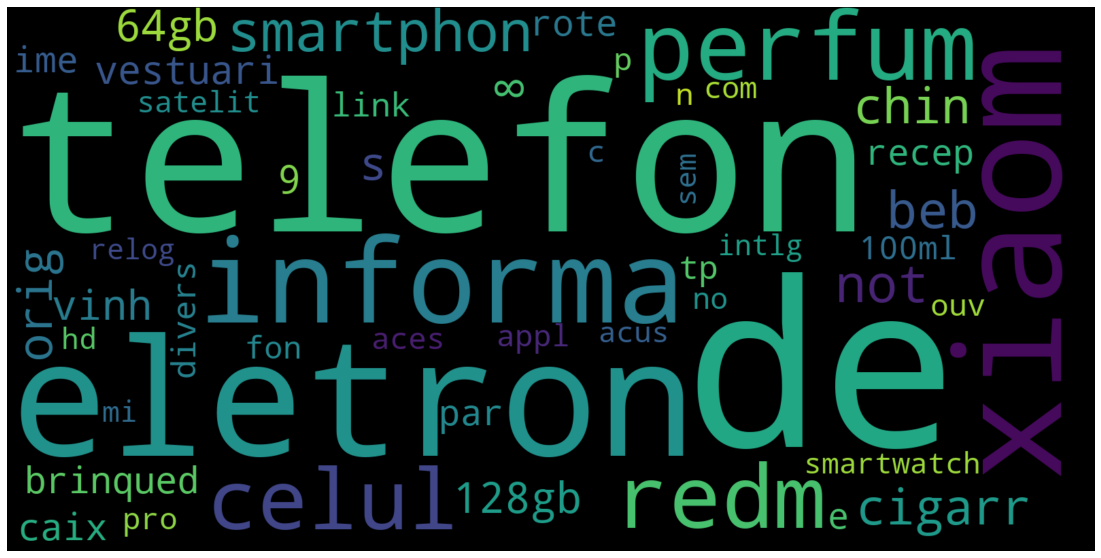

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show()

In [87]:
df_word_count['descricao_limpa_stemming'] = text.keys()
df_word_count.head(10)

,descricao_limpa,descricao_limpa_sem_stopwords,descricao_limpa_stemming
0,de,telefones,de
1,eletronicos,informatica,telefon
2,telefones,celular,eletron
3,xiaomi,smartphone,xiaom
4,informatica,bebidas,informa
5,redmi,telefone,perfum
6,celular,perfume,redm
7,smartphone,perfumes,celul
8,note,vinho,smartphon
9,china,roteador,not


### Conclusão: ainda há o problema das stopwords, mas com  retirada dos afixos houve agrupamento de algumas palavras como 'feminino' e 'feminina', 'boneco' e 'boneca', 'diversos' e 'diversas', entre outras. Mas aparentemente não alterou as palavras mais frequentes.

# obs: esse dataframe não será utilizado como dado de entrada do modelo

## 7.3 - Salva dataframe em formato parquet

In [88]:
secta.to_parquet('3_secta_desc_limpa_stemming.parquet')  # salva em formato parquet

## 8 - Cria a coluna 'descricao_limpa_sem_stopwords_stemming'
## 8.1 - Nessa coluna foram retiradas as stopwords e os afixos

In [89]:
num_words, word_count = cria_coluna_descricao(secta, 'descricao', 'descricao_limpa_sem_stopwords_stemming', stopwords, True)

In [90]:
# itens.loc[8].descricao, itens.loc[8].descricao_limpa_sem_stopwords_stemming

In [91]:
word_count.most_common(20)

[(b'telefon', 38773),
 (b'informa', 23422),
 (b'perfum', 22427),
 (b'celul', 17507),
 (b'smartphon', 16322),
 (b'beb', 13189),
 (b'vinh', 9010),
 (b'vestuari', 7699),
 (b'brinqued', 6789),
 (b'rote', 6414),
 (b'recep', 6365),
 (b'cigarr', 5486),
 (b'divers', 5404),
 (b'fon', 4954),
 (b'pro', 4590),
 (b'aces', 4484),
 (b'satelit', 4378),
 (b'acus', 4012),
 (b'smartwatch', 3959),
 (b'relog', 3852)]

## 8.2 - Nuvem de palavras - 50 palavras mais frequentes

In [92]:
max_values = 50
text = {}
for (k, v) in word_count.most_common(max_values):
    text[str(k.decode())] = v

In [93]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(text)

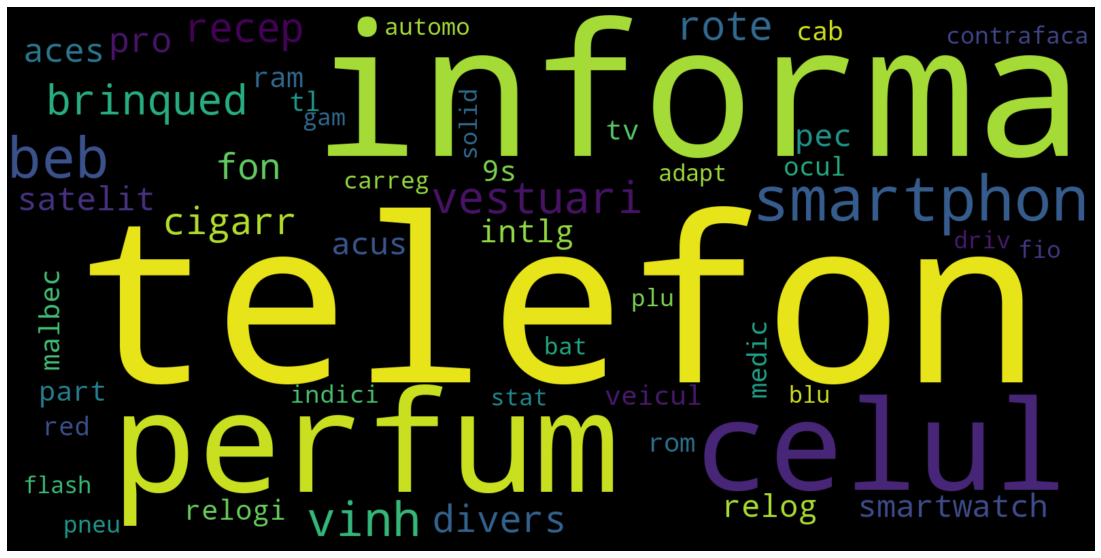

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show()

In [95]:
df_word_count['descricao_limpa_sem_stopwords_stemming'] = text.keys()

In [96]:
df_word_count = df_word_count.drop('descricao_limpa_stemming', 1)

In [97]:
df_word_count.head(20)

,descricao_limpa,descricao_limpa_sem_stopwords,descricao_limpa_sem_stopwords_stemming
0,de,telefones,telefon
1,eletronicos,informatica,informa
2,telefones,celular,perfum
3,xiaomi,smartphone,celul
4,informatica,bebidas,smartphon
5,redmi,telefone,beb
6,celular,perfume,vinh
7,smartphone,perfumes,vestuari
8,note,vinho,brinqued
9,china,roteador,rote


### Conclusão: retirando as stopwords podemos perceber uma diferença nas palavras mais relevantes. Contudo o fato de utilizar a técnica de stemming não surte muito efeito.

## 8.3 - Salva dataframe em formato parquet

In [98]:
secta.to_parquet('3_secta_desc_limpa_sem_stopwords_stemming.parquet')  # salva em formato parquet